In [1]:
from konlpy.tag import Okt, Kkma, Hannanum

In [2]:
# 어떤 문장을 쓰냐에 따라 어떤 토크나이저를 사용할지 정해야 함.
okt = Okt()
kkma = Kkma()
han = Hannanum()

In [3]:
sample_text = '난 너가 필요 없어 전화해줘 지금'

In [4]:
for tokenizer in [okt, kkma, han]:
    print(tokenizer, '를 사용한 결과')
    print(tokenizer.morphs(sample_text))
    print('-----------------------------------------------------------------------')

<konlpy.tag._okt.Okt object at 0x0000021BBCB95550> 를 사용한 결과
['난', '너', '가', '필요', '없어', '전화', '해줘', '지금']
-----------------------------------------------------------------------
<konlpy.tag._kkma.Kkma object at 0x0000021BBCB95B50> 를 사용한 결과
['낳', 'ㄴ', '너', '가', '필요', '없', '어', '전화', '하', '어', '주', '어', '지금']
-----------------------------------------------------------------------
<konlpy.tag._hannanum.Hannanum object at 0x0000021BBCC916D0> 를 사용한 결과
['나', 'ㄴ', '너', '가', '필요', '없', '어', '전화', '하', '어', '주', '어', '지금']
-----------------------------------------------------------------------


In [5]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [6]:
# 품사태그 별로 분류해보기 (딕셔너리, 데이터프레임)

In [7]:
word_list = okt.pos(sample_text)
word_list

[('난', 'Noun'),
 ('너', 'Noun'),
 ('가', 'Josa'),
 ('필요', 'Noun'),
 ('없어', 'Adjective'),
 ('전화', 'Noun'),
 ('해줘', 'Verb'),
 ('지금', 'Noun')]

In [8]:
# 품사별로 분류할 딕셔너리 초기화
pos_dict = {}

# 품사별로 단어를 분류
for word, pos in word_list:
    if pos not in pos_dict:
        pos_dict[pos] = []  # 품사가 없으면 리스트 초기화
    pos_dict[pos].append(word)

In [9]:
pos_dict

{'Noun': ['난', '너', '필요', '전화', '지금'],
 'Josa': ['가'],
 'Adjective': ['없어'],
 'Verb': ['해줘']}

In [10]:
tag_dict = {}

for k in okt.tagset.keys():
    tag_dict[k] = []

for p in okt.pos(sample_text):
    tag_dict[p[1]].append(p[0])

tag_dict

{'Adjective': ['없어'],
 'Adverb': [],
 'Alpha': [],
 'Conjunction': [],
 'Determiner': [],
 'Eomi': [],
 'Exclamation': [],
 'Foreign': [],
 'Hashtag': [],
 'Josa': ['가'],
 'KoreanParticle': [],
 'Noun': ['난', '너', '필요', '전화', '지금'],
 'Number': [],
 'PreEomi': [],
 'Punctuation': [],
 'ScreenName': [],
 'Suffix': [],
 'Unknown': [],
 'Verb': ['해줘']}

In [11]:
import pandas as pd

df = pd.DataFrame.from_dict(tag_dict, orient='index')

In [12]:
df

,0,1,2,3,4
Adjective,없어,None,None,None,None
Adverb,None,None,None,None,None
Alpha,None,None,None,None,None
Conjunction,None,None,None,None,None
Determiner,None,None,None,None,None
Eomi,None,None,None,None,None
Exclamation,None,None,None,None,None
Foreign,None,None,None,None,None
Hashtag,None,None,None,None,None
Josa,가,None,None,None,None


In [13]:
okt.nouns(sample_text)

['난', '너', '필요', '전화', '지금']

In [14]:
stopwords = ['가', '없어']

In [15]:
token = okt.morphs(sample_text)

In [16]:
[word for word in token if word not in stopwords]

['난', '너', '필요', '전화', '해줘', '지금']

In [17]:
from ckonlpy.tag import Twitter, Postprocessor

In [18]:
twitter = Twitter()
postprocessor = Postprocessor(twitter, stopwords=stopwords)

d:\workspace\Chunjae_Bigdata_9th\9.4~9.23\.conda\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [19]:
postprocessor.pos(sample_text)

[('난', 'Noun'),
 ('너', 'Noun'),
 ('필요', 'Noun'),
 ('전화', 'Noun'),
 ('해', 'Josa'),
 ('줘', 'Verb'),
 ('지금', 'Noun')]

In [20]:
twitter.add_dictionary('전화해줘', 'Noun') #품사 정하기(명사가 아니면 잘 적용 안 됨)

In [21]:
twitter.pos(sample_text)

[('난', 'Noun'),
 ('너', 'Noun'),
 ('가', 'Josa'),
 ('필요', 'Noun'),
 ('없어', 'Adjective'),
 ('전화해줘', 'Noun'),
 ('지금', 'Noun')]

In [22]:
sample_text = '미주는 대학 졸업 후 반년 이상 지옥과도 같은 취업난을 몸으로 부딪히며 참 많이도 좌절해야 했었다. 합격자 명단에 없다는 말을 들을 때마다 마음은 갈가리 찢어졌고, 그 깊은 상실감은 누구와 나눌 수조차 없었다.'

In [23]:
twitter.pos(sample_text)

[('미주', 'Noun'),
 ('는', 'Josa'),
 ('대학', 'Noun'),
 ('졸업', 'Noun'),
 ('후', 'Noun'),
 ('반년', 'Noun'),
 ('이상', 'Noun'),
 ('지옥', 'Noun'),
 ('과도', 'Noun'),
 ('같은', 'Adjective'),
 ('취업', 'Noun'),
 ('난', 'Josa'),
 ('을', 'Josa'),
 ('몸', 'Noun'),
 ('으로', 'Josa'),
 ('부딪히며', 'Verb'),
 ('참', 'Verb'),
 ('많', 'Adjective'),
 ('이도', 'Noun'),
 ('좌절', 'Noun'),
 ('해', 'Josa'),
 ('야', 'Exclamation'),
 ('했었다', 'Verb'),
 ('.', 'Punctuation'),
 ('합격자', 'Noun'),
 ('명단', 'Noun'),
 ('에', 'Josa'),
 ('없다는', 'Adjective'),
 ('말', 'Noun'),
 ('을', 'Josa'),
 ('들을', 'Verb'),
 ('때', 'Noun'),
 ('마다', 'Noun'),
 ('마음', 'Noun'),
 ('은', 'Josa'),
 ('갈가리', 'Noun'),
 ('찢어졌고', 'Verb'),
 (',', 'Punctuation'),
 ('그', 'Noun'),
 ('깊은', 'Adjective'),
 ('상', 'Noun'),
 ('실감', 'Noun'),
 ('은', 'Josa'),
 ('누구', 'Noun'),
 ('와', 'Josa'),
 ('나눌', 'Verb'),
 ('수조', 'Noun'),
 ('차', 'Noun'),
 ('없었다', 'Adjective'),
 ('.', 'Punctuation')]

In [24]:
twitter.add_dictionary('취업난', 'Noun')

In [25]:
twitter.pos(sample_text)

[('미주', 'Noun'),
 ('는', 'Josa'),
 ('대학', 'Noun'),
 ('졸업', 'Noun'),
 ('후', 'Noun'),
 ('반년', 'Noun'),
 ('이상', 'Noun'),
 ('지옥', 'Noun'),
 ('과도', 'Noun'),
 ('같은', 'Adjective'),
 ('취업난', 'Noun'),
 ('을', 'Josa'),
 ('몸', 'Noun'),
 ('으로', 'Josa'),
 ('부딪히며', 'Verb'),
 ('참', 'Verb'),
 ('많', 'Adjective'),
 ('이도', 'Noun'),
 ('좌절', 'Noun'),
 ('해', 'Josa'),
 ('야', 'Exclamation'),
 ('했었다', 'Verb'),
 ('.', 'Punctuation'),
 ('합격자', 'Noun'),
 ('명단', 'Noun'),
 ('에', 'Josa'),
 ('없다는', 'Adjective'),
 ('말', 'Noun'),
 ('을', 'Josa'),
 ('들을', 'Verb'),
 ('때', 'Noun'),
 ('마다', 'Noun'),
 ('마음', 'Noun'),
 ('은', 'Josa'),
 ('갈가리', 'Noun'),
 ('찢어졌고', 'Verb'),
 (',', 'Punctuation'),
 ('그', 'Noun'),
 ('깊은', 'Adjective'),
 ('상', 'Noun'),
 ('실감', 'Noun'),
 ('은', 'Josa'),
 ('누구', 'Noun'),
 ('와', 'Josa'),
 ('나눌', 'Verb'),
 ('수조', 'Noun'),
 ('차', 'Noun'),
 ('없었다', 'Adjective'),
 ('.', 'Punctuation')]

In [26]:
# 순서가 있는 단어 집합을 묶어서 명사로 표시함.(엔그램 분석)

ngrams = [
    (('대학', '졸업'), 'Noun'),
    (('지옥','과도'),'Noun'),
    (('합격자', '명단'),'Noun'),
]

In [27]:
postprocessor = Postprocessor(twitter, ngrams=ngrams)

In [28]:
postprocessor.pos(sample_text)

[('미주', 'Noun'),
 ('는', 'Josa'),
 ('대학 - 졸업', 'Noun'),
 ('후', 'Noun'),
 ('반년', 'Noun'),
 ('이상', 'Noun'),
 ('지옥 - 과도', 'Noun'),
 ('같은', 'Adjective'),
 ('취업난', 'Noun'),
 ('을', 'Josa'),
 ('몸', 'Noun'),
 ('으로', 'Josa'),
 ('부딪히며', 'Verb'),
 ('참', 'Verb'),
 ('많', 'Adjective'),
 ('이도', 'Noun'),
 ('좌절', 'Noun'),
 ('해', 'Josa'),
 ('야', 'Exclamation'),
 ('했었다', 'Verb'),
 ('.', 'Punctuation'),
 ('합격자 - 명단', 'Noun'),
 ('에', 'Josa'),
 ('없다는', 'Adjective'),
 ('말', 'Noun'),
 ('을', 'Josa'),
 ('들을', 'Verb'),
 ('때', 'Noun'),
 ('마다', 'Noun'),
 ('마음', 'Noun'),
 ('은', 'Josa'),
 ('갈가리', 'Noun'),
 ('찢어졌고', 'Verb'),
 (',', 'Punctuation'),
 ('그', 'Noun'),
 ('깊은', 'Adjective'),
 ('상', 'Noun'),
 ('실감', 'Noun'),
 ('은', 'Josa'),
 ('누구', 'Noun'),
 ('와', 'Josa'),
 ('나눌', 'Verb'),
 ('수조', 'Noun'),
 ('차', 'Noun'),
 ('없었다', 'Adjective'),
 ('.', 'Punctuation')]

In [29]:
twitter.add_dictionary('수조차', 'Noun')
twitter.add_dictionary('상실감', 'Noun')
twitter.add_dictionary('많이도', 'Noun')

In [30]:
twitter.pos(sample_text)

[('미주', 'Noun'),
 ('는', 'Josa'),
 ('대학', 'Noun'),
 ('졸업', 'Noun'),
 ('후', 'Noun'),
 ('반년', 'Noun'),
 ('이상', 'Noun'),
 ('지옥', 'Noun'),
 ('과도', 'Noun'),
 ('같은', 'Adjective'),
 ('취업난', 'Noun'),
 ('을', 'Josa'),
 ('몸', 'Noun'),
 ('으로', 'Josa'),
 ('부딪히며', 'Verb'),
 ('참', 'Verb'),
 ('많이도', 'Noun'),
 ('좌절', 'Noun'),
 ('해', 'Josa'),
 ('야', 'Exclamation'),
 ('했었다', 'Verb'),
 ('.', 'Punctuation'),
 ('합격자', 'Noun'),
 ('명단', 'Noun'),
 ('에', 'Josa'),
 ('없다는', 'Adjective'),
 ('말', 'Noun'),
 ('을', 'Josa'),
 ('들을', 'Verb'),
 ('때', 'Noun'),
 ('마다', 'Noun'),
 ('마음', 'Noun'),
 ('은', 'Josa'),
 ('갈가리', 'Noun'),
 ('찢어졌고', 'Verb'),
 (',', 'Punctuation'),
 ('그', 'Noun'),
 ('깊은', 'Adjective'),
 ('상실감', 'Noun'),
 ('은', 'Josa'),
 ('누구', 'Noun'),
 ('와', 'Josa'),
 ('나눌', 'Verb'),
 ('수조차', 'Noun'),
 ('없었다', 'Adjective'),
 ('.', 'Punctuation')]

In [31]:
tag_dict = {}

for k in twitter.tagset.keys():
    tag_dict[k] = []

for p in twitter.pos(sample_text):
    tag_dict[p[1]].append(p[0])

tag_dict

{'Adjective': ['같은', '없다는', '깊은', '없었다'],
 'Adverb': [],
 'Alpha': [],
 'Conjunction': [],
 'Determiner': [],
 'Eomi': [],
 'Exclamation': ['야'],
 'Foreign': [],
 'Hashtag': [],
 'Josa': ['는', '을', '으로', '해', '에', '을', '은', '은', '와'],
 'KoreanParticle': [],
 'Noun': ['미주',
  '대학',
  '졸업',
  '후',
  '반년',
  '이상',
  '지옥',
  '과도',
  '취업난',
  '몸',
  '많이도',
  '좌절',
  '합격자',
  '명단',
  '말',
  '때',
  '마다',
  '마음',
  '갈가리',
  '그',
  '상실감',
  '누구',
  '수조차'],
 'Number': [],
 'Modifier': [],
 'PreEomi': [],
 'Punctuation': ['.', ',', '.'],
 'ScreenName': [],
 'Suffix': [],
 'Unknown': [],
 'Verb': ['부딪히며', '참', '했었다', '들을', '찢어졌고', '나눌']}

In [32]:
sample_text = '나는 아버지를 아버지라 부르지 못하고, 형을 형이라 부르지 못하니, 이 어찌 사람이라 할 수 있겠는가. 그러므로 나는 이 세상 사람들과 더불어 한 집에서 살 수 없으니, 깊은 산속에 들어가 도적이 되어 도리어 의적이 되어 천하의 불의를 베고 불쌍한 백성을 구하리라.'

In [33]:
twitter.pos(sample_text)

[('나', 'Noun'),
 ('는', 'Josa'),
 ('아버지', 'Noun'),
 ('를', 'Josa'),
 ('아버지', 'Noun'),
 ('라', 'Josa'),
 ('부르지', 'Verb'),
 ('못', 'Noun'),
 ('하고', 'Josa'),
 (',', 'Punctuation'),
 ('형', 'Noun'),
 ('을', 'Josa'),
 ('형', 'Noun'),
 ('이라', 'Josa'),
 ('부르지', 'Verb'),
 ('못', 'Noun'),
 ('하니', 'Noun'),
 (',', 'Punctuation'),
 ('이', 'Noun'),
 ('어찌', 'Noun'),
 ('사람', 'Noun'),
 ('이라', 'Josa'),
 ('할', 'Verb'),
 ('수', 'Noun'),
 ('있겠', 'Adjective'),
 ('는가', 'Noun'),
 ('.', 'Punctuation'),
 ('그러므로', 'Conjunction'),
 ('나', 'Noun'),
 ('는', 'Josa'),
 ('이', 'Noun'),
 ('세상', 'Noun'),
 ('사람', 'Noun'),
 ('들과', 'Verb'),
 ('더', 'Noun'),
 ('불어', 'Noun'),
 ('한', 'Verb'),
 ('집', 'Noun'),
 ('에서', 'Josa'),
 ('살', 'Noun'),
 ('수', 'Noun'),
 ('없으니', 'Adjective'),
 (',', 'Punctuation'),
 ('깊은', 'Adjective'),
 ('산속', 'Noun'),
 ('에', 'Josa'),
 ('들', 'Verb'),
 ('어가', 'Noun'),
 ('도적', 'Noun'),
 ('이', 'Josa'),
 ('되어', 'Verb'),
 ('도리어', 'Noun'),
 ('의적', 'Noun'),
 ('이', 'Josa'),
 ('되어', 'Verb'),
 ('천하', 'Noun'),
 ('의', 'Josa'),
 (

In [34]:
tag_dict = {}

for k in twitter.tagset.keys():
    tag_dict[k] = []

tag_dict['Modifier'] = []

for p in twitter.pos(sample_text):
    tag_dict[p[1]].append(p[0])

tag_dict

df = pd.DataFrame.from_dict(tag_dict, orient='index')
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Adjective,있겠,없으니,깊은,불쌍한,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Adverb,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Alpha,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Conjunction,그러므로,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Determiner,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Eomi,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Exclamation,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Foreign,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Hashtag,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Josa,는,를,라,하고,을,이라,이라,는,에서,에,...,None,None,None,None,None,None,None,None,None,None


In [35]:
tag_dict = {}
for tag in twitter.tagset.keys():
    tag_dict[tag] = 0

tag_dict['Modifier'] = 0

In [36]:
for p in twitter.pos(sample_text):
    tag_dict[p[-1]] += 1

In [37]:
import matplotlib.pyplot as plt
import koreanize_matplotlib # 매트플롯에서 한글 나오게 해주는 라이브러리

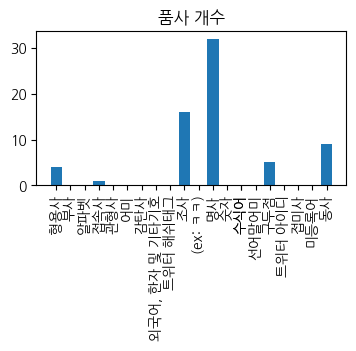

In [38]:
plt.subplots(figsize = (4,2))
plt.bar(tag_dict.keys(), tag_dict.values())
plt.xticks(list(twitter.tagset.keys()) + ['Modifier'], list(twitter.tagset.values()) + ['수식어'], rotation = 90)
plt.title('품사 개수')
plt.show()

In [39]:
from nltk import Text
from wordcloud import WordCloud # 워드클라우드

In [40]:
sample_text = '''
'옛날 한 마을에 착하고 성실한 사람이 살고 있었다. 그는 매일같이 밭을 갈고 씨를 뿌리며, 열심히 일하여 가족을 돌보았다. 어느 날, 밭을 갈던 중 갑자기 땅에서 빛나는 상자를 발견했다. 그 상자는 열리지 않았고, 그는 이 상자를 마을 장로에게 가져갔다.

마을 장로는 상자를 살펴보더니, 그것은 오래전 이 마을에 전해 내려오는 보물 상자라고 설명했다. 하지만 그 상자는 쉽게 열리지 않으며, 오직 마음이 청렴하고 거짓이 없는 사람만이 열 수 있다고 했다. 착한 사람은 상자를 열 수 있을지 고민했지만, 결국 용기를 내어 시도하기로 했다.

그는 조용히 상자 앞에 앉아, 마음속으로 자신이 살아온 길을 되돌아보았다. 그는 거짓말을 하지 않았고, 남을 속인 적도 없었다. 그의 마음은 항상 가족과 이웃을 위한 것이었으며, 나쁜 마음을 품은 적이 없었다. 상자를 열려고 시도했을 때, 갑자기 상자가 천천히 열리기 시작했다.

상자 안에는 황금과 보석이 가득했지만, 착한 사람은 그것을 보고도 탐욕을 부리지 않았다. 그는 그것을 마을 사람들과 나누기로 결정했고, 마을 사람들은 그의 선행에 감동했다. 그 후로도 그는 마을에서 존경받는 사람이 되었고, 그의 이야기는 오래도록 전해졌다.

이 이야기는 결국 선행과 겸손이 보답을 받는다는 것을 가르쳐준다. 비록 지금 당장은 보이지 않더라도, 착한 마음은 결국 빛을 발하게 되고, 사람들에게 좋은 영향을 미친다. 사람들은 이 이야기를 듣고 자신도 더 나은 사람이 되기 위해 노력하게 되었다. 그리고 그 착한 사람의 이름은 마을 사람들의 입에서 입으로 전해지며 영원히 기억되었다.

'
'''

In [41]:
okt.pos(sample_text)

[('\n', 'Foreign'),
 ("'", 'Punctuation'),
 ('옛날', 'Noun'),
 ('한', 'Verb'),
 ('마을', 'Noun'),
 ('에', 'Josa'),
 ('착하고', 'Adjective'),
 ('성실한', 'Adjective'),
 ('사람', 'Noun'),
 ('이', 'Josa'),
 ('살', 'Noun'),
 ('고', 'Josa'),
 ('있었다', 'Adjective'),
 ('.', 'Punctuation'),
 ('그', 'Noun'),
 ('는', 'Josa'),
 ('매일', 'Noun'),
 ('같이', 'Josa'),
 ('밭', 'Noun'),
 ('을', 'Josa'),
 ('갈고', 'Noun'),
 ('씨', 'Noun'),
 ('를', 'Josa'),
 ('뿌리', 'Noun'),
 ('며', 'Josa'),
 (',', 'Punctuation'),
 ('열심히', 'Adverb'),
 ('일', 'Noun'),
 ('하여', 'Verb'),
 ('가족', 'Noun'),
 ('을', 'Josa'),
 ('돌보았다', 'Verb'),
 ('.', 'Punctuation'),
 ('어느', 'Adverb'),
 ('날', 'Noun'),
 (',', 'Punctuation'),
 ('밭', 'Noun'),
 ('을', 'Josa'),
 ('갈던', 'Verb'),
 ('중', 'Noun'),
 ('갑자기', 'Noun'),
 ('땅', 'Noun'),
 ('에서', 'Josa'),
 ('빛나는', 'Verb'),
 ('상자', 'Noun'),
 ('를', 'Josa'),
 ('발견', 'Noun'),
 ('했다', 'Verb'),
 ('.', 'Punctuation'),
 ('그', 'Noun'),
 ('상자', 'Noun'),
 ('는', 'Josa'),
 ('열', 'Modifier'),
 ('리지', 'Noun'),
 ('않았고', 'Verb'),
 (',', 'Punctuati

In [42]:
text_count = Text(okt.nouns(sample_text), name = 'ebs')

In [43]:
font_path = 'C:\Windows\Fonts\malgun.ttf'

In [44]:
wc = WordCloud(width=640, height=360, background_color='white', font_path=font_path, max_words=100, min_word_length=3)
# max_words : 그래프에 표시할 최대 단어 개수, min_word_length : 단어가 그래프에 나오기 위한 최소 등장 횟수

In [45]:
cloud = wc.generate_from_frequencies(text_count.vocab()) # 빈도수 정보로 시각화하는 워드클라우드

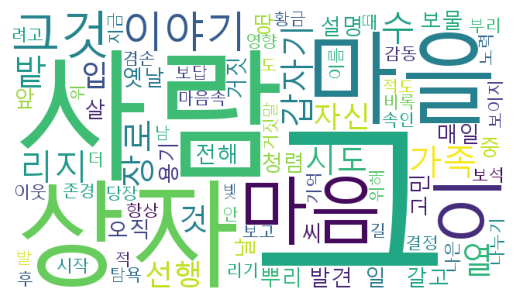

In [46]:
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [47]:
# 장미와 찔레 워드클라우드 그리기
# 엔그램분석으로 이상한 거 뺴고 이상한 한 글자짜리는 제외하도록 하기